Exercises for Students Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

Exercise: Compare Rainfall Between London and Seattle Objective: Compare the total weekly rainfall between London and Seattle over a full year. Tasks: Fetch Data: Retrieve hourly precipitation data for London and Seattle for the year 2022. London Coordinates: Latitude 51.5074, Longitude -0.1278 Seattle Coordinates: Latitude 47.6062, Longitude -122.3321 Data Cleaning: Convert the time columns to datetime objects and set them as the index. Handle any missing values. Resample Data: Resample the hourly data to weekly totals. Visualization: Plot the weekly total precipitation for both cities on the same graph. Analysis: Determine which city had more rainfall overall and identify any interesting patterns.

Note: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

Tips: API Parameters: Make sure to adjust the parameters like latitude, longitude, start_date, end_date, hourly, and timezone as needed. Error Handling: Always check if your API requests are successful before proceeding. Data Storage: Consider saving your DataFrames to CSV files for future analysis. Visualization: Customize your plots with titles, labels, legends, and gridlines for better readability. Happy coding!**

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def fetch_weather_data(lat, lon, start_date, end_date):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "hourly": "precipitation",
        "timezone": "UTC"
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"API request failed with status code {response.status_code}")

In [3]:
def process_weather_data(data):
    df = pd.DataFrame({
        'time': pd.to_datetime(data['hourly']['time']),
        'precipitation': data['hourly']['precipitation']
    })
    df.set_index('time', inplace=True)
    
    # Handling missing values
    if df['precipitation'].isnull().sum() > 0:
        print("Missing values detected in precipitation data.")
        
        df['precipitation'] = df['precipitation'].interpolate(method='linear')
        
        print("Missing values handled.")
    
    return df

In [4]:
start_date = "2022-01-01"
end_date = "2022-12-31"

print("Fetching data for London...")
london_data = fetch_weather_data(51.5074, -0.1278, start_date, end_date)
london_df = process_weather_data(london_data)

print("Fetching data for Seattle...")
seattle_data = fetch_weather_data(47.6062, -122.3321, start_date, end_date)
seattle_df = process_weather_data(seattle_data)

Fetching data for London...
Fetching data for Seattle...


In [5]:
london_weekly = london_df.resample('W').sum()
seattle_weekly = seattle_df.resample('W').sum()

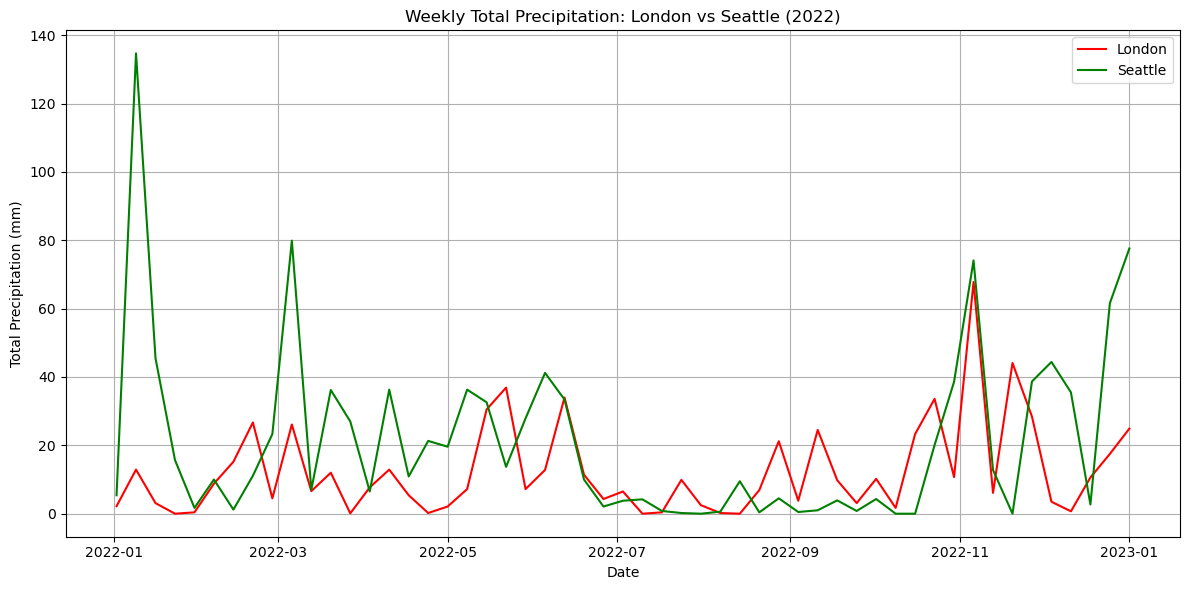

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(london_weekly.index, london_weekly['precipitation'], label='London', color='red')
plt.plot(seattle_weekly.index, seattle_weekly['precipitation'], label='Seattle', color='green')
plt.title('Weekly Total Precipitation: London vs Seattle (2022)')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
london_total = london_df['precipitation'].sum()
seattle_total = seattle_df['precipitation'].sum()

In [8]:
print(f"Total rainfall in London for 2022: {london_total:.2f} mm")
print(f"Total rainfall in Seattle for 2022: {seattle_total:.2f} mm")

if london_total > seattle_total:
    print("London had more rainfall overall in 2022.")
else:
    print("Seattle had more rainfall overall in 2022.")

Total rainfall in London for 2022: 663.10 mm
Total rainfall in Seattle for 2022: 1131.10 mm
Seattle had more rainfall overall in 2022.


In [9]:
london_weekly.to_csv('london_weekly_precipitation_2022.csv')
seattle_weekly.to_csv('seattle_weekly_precipitation_2022.csv')